# CAR PRICE PREDICTION

In [1]:
# Importing Necessary Library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
# Load Data 
data = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

# 1. DATA READING

In [3]:
data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [4]:
data.shape

(188533, 13)

In [5]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [6]:
data['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [7]:
data[(data.transmission.str.contains('Automatic')) | (data.transmission.str.contains('A/T'))]['transmission'].unique()

array(['A/T', '7-Speed A/T', '8-Speed A/T', '10-Speed Automatic',
       '1-Speed A/T', '6-Speed A/T', '10-Speed A/T', '9-Speed A/T',
       '8-Speed Automatic', '9-Speed Automatic', '5-Speed A/T',
       'Automatic', '7-Speed Automatic with Auto-Shift',
       '6-Speed Automatic', '4-Speed Automatic', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '8-Speed Automatic with Auto-Shift', '7-Speed Automatic',
       '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T',
       '10-Speed Automatic with Overdrive', '7-Speed DCT Automatic'],
      dtype=object)

In [8]:
data['brand'].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [9]:
data['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [10]:
data['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [11]:
data['accident'].describe()

count            186081
unique                2
top       None reported
freq             144514
Name: accident, dtype: object

In [12]:
data['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

# 2. DATA VISUALIZATION

<Axes: xlabel='brand', ylabel='price'>

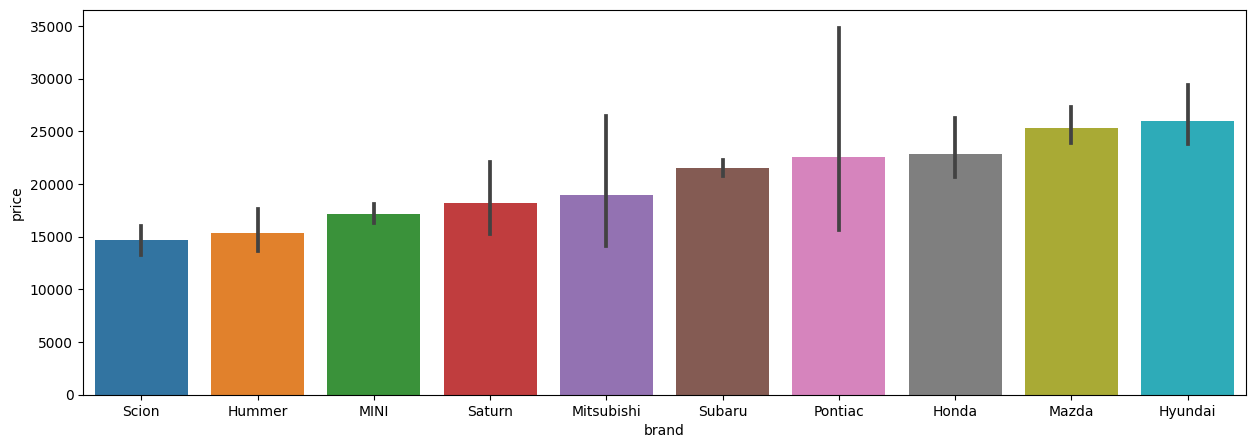

In [13]:
plt.figure(figsize=(15,5))
brand_order = data.groupby('brand')['price'].mean().sort_values(ascending = True).head(10).index
sns.barplot(data=data , x='brand' ,y='price',order = brand_order)

<Axes: xlabel='brand', ylabel='count'>

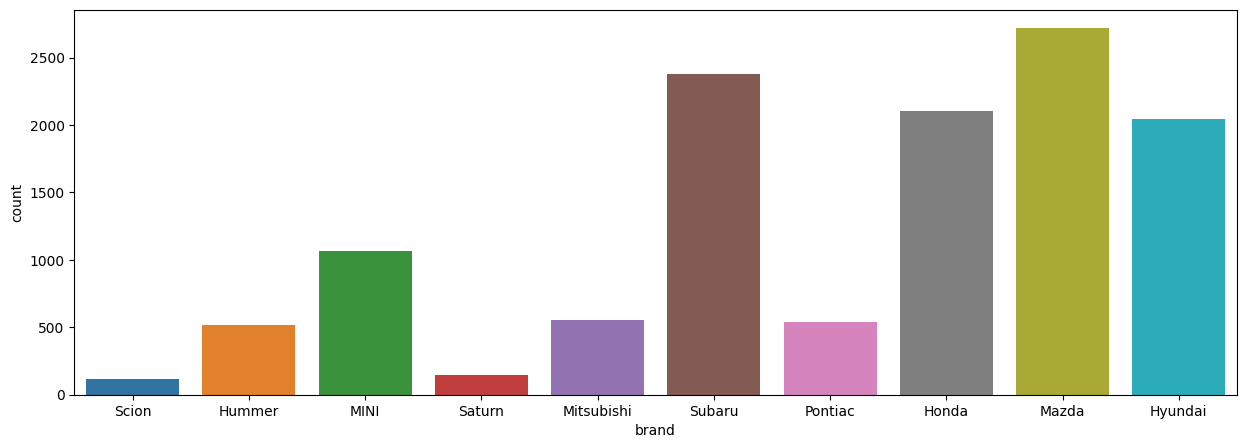

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(data=data , x='brand' ,order = brand_order)

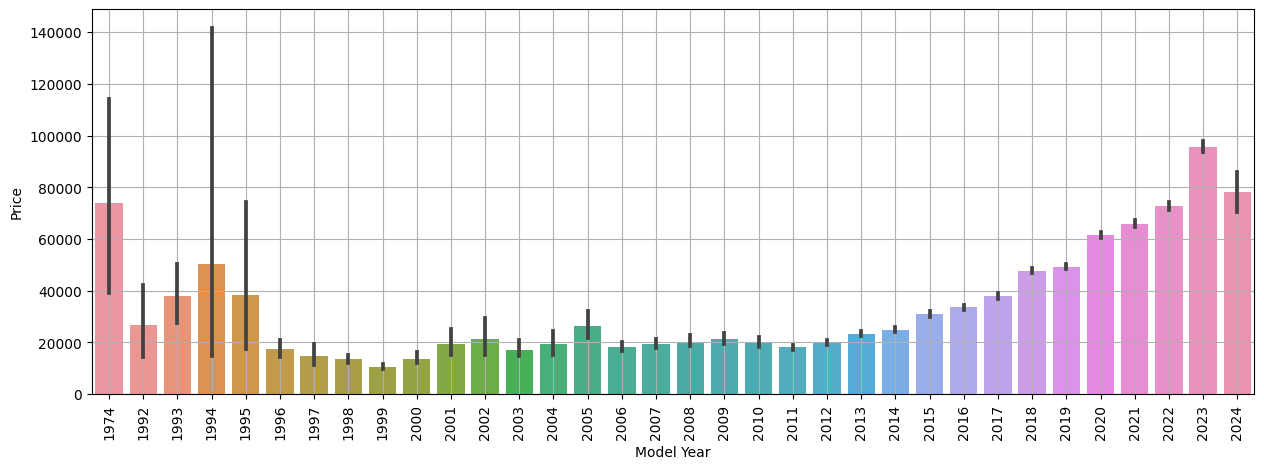

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(data=data , x='model_year',y='price' )
plt.grid()
plt.xticks( rotation = 'vertical')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

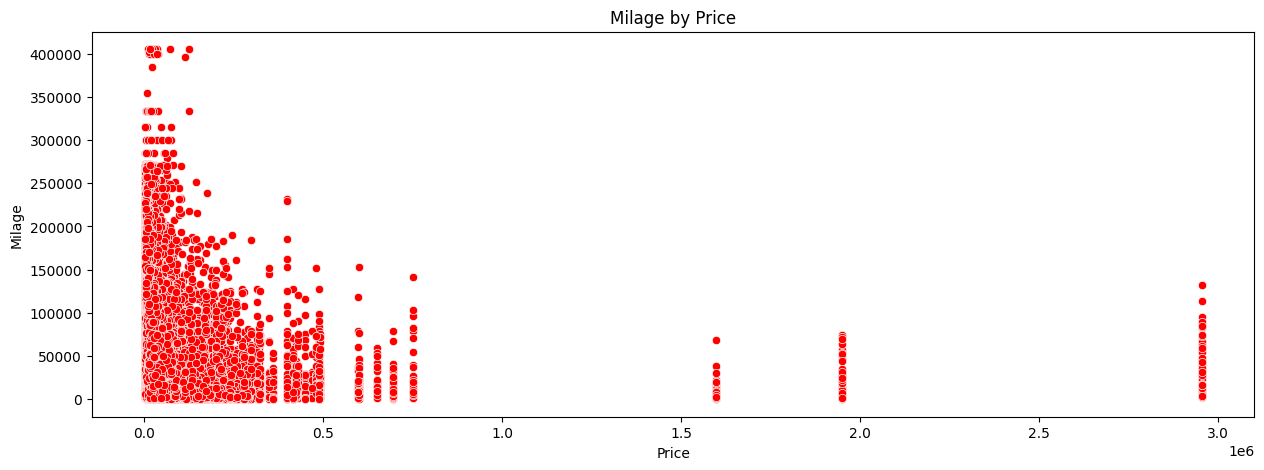

In [16]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,y='milage' , x='price' , color = 'r' )
plt.title('Milage by Price')
plt.xlabel('Price')
plt.ylabel('Milage')
plt.show()

Text(0.5, 1.0, 'Count of Car Fuel type')

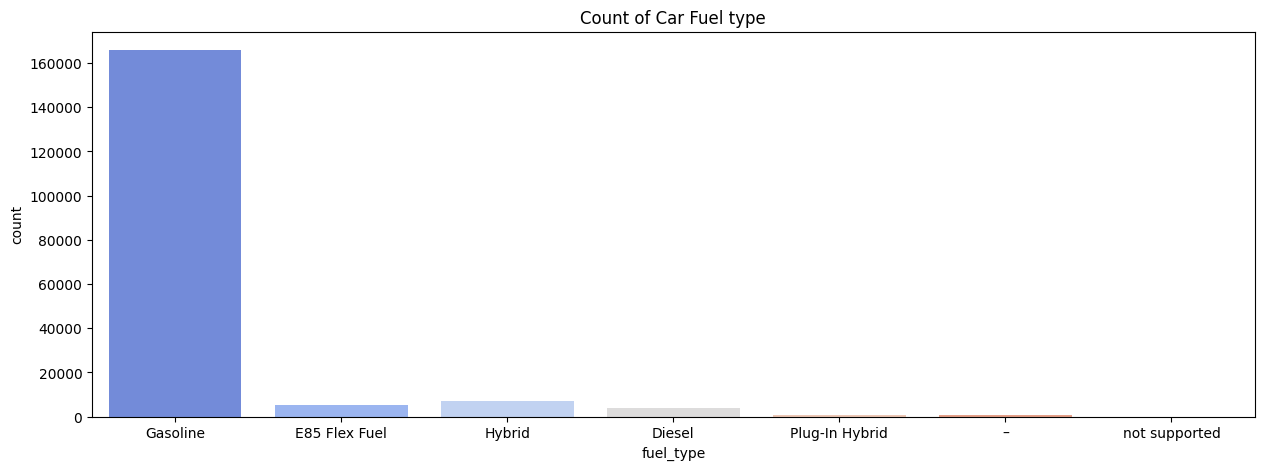

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x='fuel_type',palette = 'coolwarm')
plt.title('Count of Car Fuel type')

Text(0, 0.5, 'Milage')

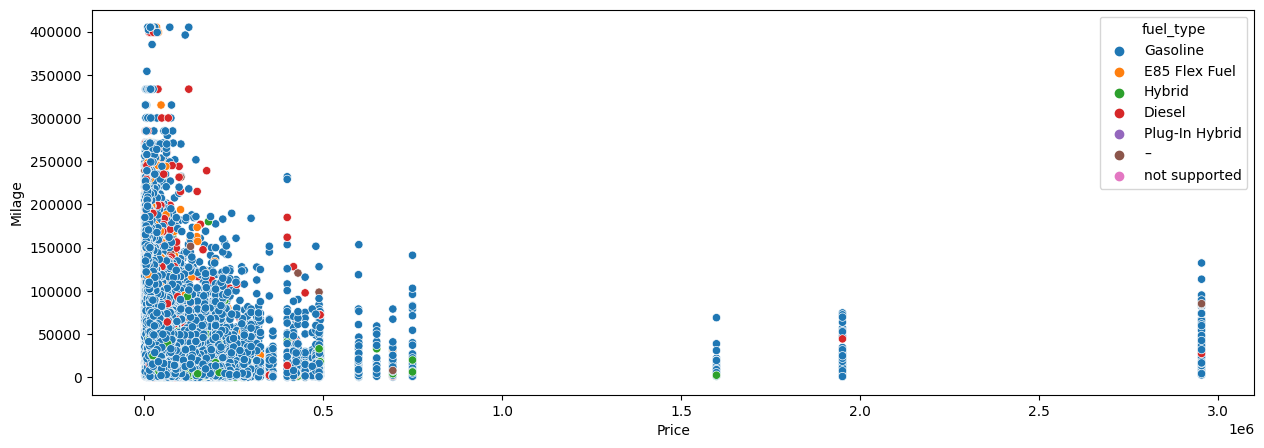

In [18]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,y='milage' , x='price' ,hue='fuel_type')
plt.xlabel('Price')
plt.ylabel('Milage')

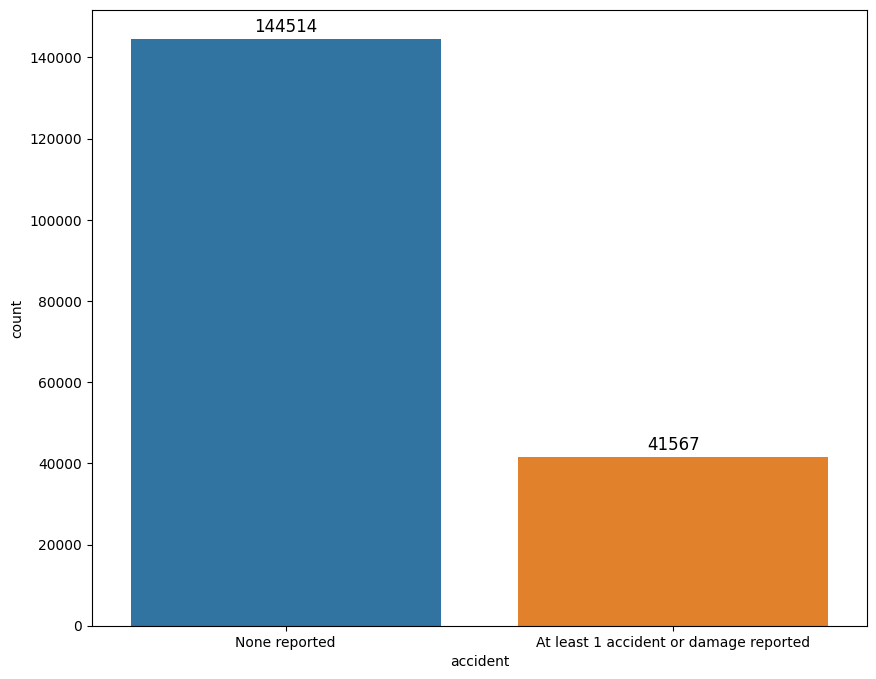

In [19]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=data,x='accident')
# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
plt.show()

Text(0, 0.5, 'Count')

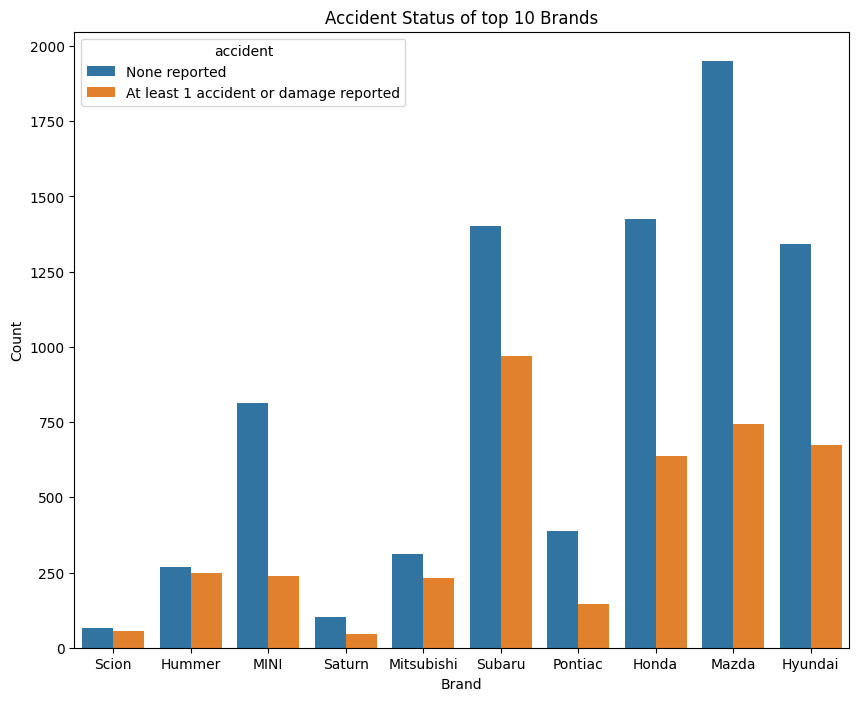

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(data=data , x='brand' , hue='accident', order = brand_order)
plt.title('Accident Status of top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Count')

<Axes: xlabel='clean_title', ylabel='count'>

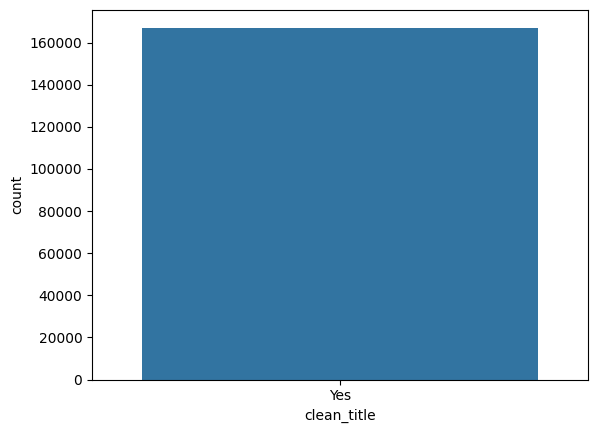

In [21]:
sns.countplot(data=data , x = 'clean_title')

# 3. DATA CLEANING

In [22]:
data.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [23]:
data['accident'].fillna('None reported' ,inplace = True)

/tmp/ipykernel_24/3972989972.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['accident'].fillna('None reported' ,inplace = True)


In [24]:
data.shape

(188533, 13)

In [25]:
data['clean_title'].fillna('No',inplace = True)

/tmp/ipykernel_24/2653428194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['clean_title'].fillna('No',inplace = True)


In [26]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [27]:
data[(data.fuel_type.isnull()) & (data.engine.apply(lambda x : 'Electric' not in x.split()))][['engine','fuel_type']].head()

,engine,fuel_type
51,Dual Motor - Standard,NaN
3286,70.0HP 1.0L 3 Cylinder Engine Gasoline Fuel,NaN
6794,490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,NaN
7233,Dual Motor - Standard,NaN
7302,134.0HP 1.8L 4 Cylinder Engine Gas/Electric Hy...,NaN


In [28]:
data['fuel_type'] = data.apply(
    lambda row: 'Electric' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('Electric', 'AH', 'Battery', 'Standard', 'kW'))
    else 'Plug-In Hybrid' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('DOHC', 'Plug-In'))
    else 'Hybrid' if pd.isnull(row['fuel_type']) and 'Hybrid' in row['engine'].split()
    else 'E85 Flex Fuel' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('Flex', 'Flexible'))
    else 'Diesel' if pd.isnull(row['fuel_type']) and 'Diesel' in row['engine'].split()
    else 'Gasoline' if pd.isnull(row['fuel_type'])  # Use Gasoline if fuel_type is null
    else row['fuel_type'],  # Retain original value if not null
    axis=1
)

In [29]:
data.fuel_type.unique()

array(['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Diesel', 'Plug-In Hybrid',
       '–', 'not supported'], dtype=object)

In [30]:
data[(data.fuel_type == '–') & (data.engine == '–') ][['engine','fuel_type']].count()

engine       772
fuel_type    772
dtype: int64

In [31]:
# Replace '–' with 'Unknown' for both fuel_type and engine where both are '-'
data.loc[(data['fuel_type'] == '–') & (data['engine'] == '–'), ['fuel_type', 'engine']] = 'Unknown'

In [32]:
data[(data.fuel_type == '–') ][['engine','fuel_type']]

,engine,fuel_type
2138,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,–
2741,582.0HP 6.0L 12 Cylinder Engine Gasoline Fuel,–
8607,310.0HP 6.8L 10 Cylinder Engine Gasoline Fuel,–
15550,395.0HP 5.7L 8 Cylinder Engine Gasoline/Mild E...,–
23676,188.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,–
105015,3.5 Liter,–
112813,3.6L V6 24V MPFI DOHC,–
128224,333.0HP 3.2L Straight 6 Cylinder Engine Gasoli...,–
187495,284.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,–


In [33]:
data['fuel_type'].replace('–', 'Gasoline', inplace=True) # manually check if all engine are Gasoline or not 

/tmp/ipykernel_24/290055138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['fuel_type'].replace('–', 'Gasoline', inplace=True) # manually check if all engine are Gasoline or not


In [34]:
data[data.fuel_type == 'not supported'][['engine','fuel_type']]

,engine,fuel_type
4823,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,not supported
18000,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,not supported
19182,182.0HP Electric Motor Hydrogen Fuel,not supported
27199,175.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,not supported
33030,182.0HP Electric Motor Hydrogen Fuel,not supported
60717,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,not supported
74096,182.0HP Electric Motor Hydrogen Fuel,not supported
86897,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,not supported
94425,550.0HP 4.8L 8 Cylinder Engine Gasoline Fuel,not supported
127066,151.0HP Electric Motor Hydrogen Fuel,not supported


In [35]:
data['fuel_type'] = data.apply(
                                lambda row : 'Gasoline' if any(keyword in row['engine'] for keyword in ['Gasoline', 'L', 'Liter']) else 'Electric'
                                if row['fuel_type']=='not supported' else row['fuel_type'],
                                axis = 1 )


In [36]:
data[data.fuel_type == 'not supported'][['engine','fuel_type']]

,engine,fuel_type


In [37]:
data[data.engine == 'not supported']

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


In [38]:
data.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [39]:
test.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [40]:
test['accident'].fillna('None reported',inplace = True)

/tmp/ipykernel_24/780368835.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['accident'].fillna('None reported',inplace = True)


In [41]:
#test[test['fuel_type'].isna()].head(500)

In [42]:
test.fuel_type.unique()

array(['Gasoline', 'Hybrid', 'Diesel', 'E85 Flex Fuel', nan,
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [43]:
test[test.fuel_type == 'Gasoline']['engine'].head(10)

0      240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
2                   3.5L V6 24V PDI DOHC Twin Turbo
3                                    2.0 Liter TFSI
4      252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
5      285.0HP 4.8L 8 Cylinder Engine Gasoline Fuel
6     270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
7                              3.8L V6 24V GDI DOHC
8      536.0HP 5.5L 8 Cylinder Engine Gasoline Fuel
9     365.0HP 3.3L V6 Cylinder Engine Gasoline Fuel
10    303.0HP 3.7L V6 Cylinder Engine Gasoline Fuel
Name: engine, dtype: object

In [44]:
#test[(test.fuel_type.isnull()) & (test['engine'].apply(lambda x : all( features not in x.split() for features in ('Electric','AH','Batery','Standard','kW'))))][['engine','fuel_type']]

In [45]:
test['fuel_type'] = test.apply(
    lambda row: 'Electric' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('Electric', 'AH', 'Battery', 'Standard', 'kW'))
    else 'Plug-In Hybrid' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('DOHC', 'Plug-In'))
    else 'Hybrid' if pd.isnull(row['fuel_type']) and 'Hybrid' in row['engine'].split()
    else 'E85 Flex Fuel' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('Flex', 'Flexible'))
    else 'Diesel' if pd.isnull(row['fuel_type']) and 'Diesel' in row['engine'].split()
    else 'Gasoline' if pd.isnull(row['fuel_type'])  # Use Gasoline if fuel_type is null
    else row['fuel_type'],  # Retain original value if not null
    axis=1
)

In [46]:
test[(test.fuel_type.isnull())][['engine','fuel_type']]

,engine,fuel_type


In [47]:
test[test.fuel_type == '–'][['engine','fuel_type']]

,engine,fuel_type
704,–,–
892,–,–
991,–,–
1008,–,–
1011,–,–
...,...,...
124669,–,–
124785,–,–
124879,–,–
125101,–,–


In [48]:
# Replace '–' with 'Unknown' for both fuel_type and engine where both are '-'
test.loc[(test['fuel_type'] == '–') & (test['engine'] == '–'), ['fuel_type', 'engine']] = 'Unknown'


In [49]:
test[(test.fuel_type == '–') ][['engine','fuel_type']]

,engine,fuel_type
12128,181.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,–
14867,250.0HP 5.9L Straight 6 Cylinder Engine Diesel...,–
16091,429.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,–
52090,2.5 Liter,–
54262,115.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,–
72030,245.0HP 5.9L Straight 6 Cylinder Engine Diesel...,–
76736,236.0HP 4.0L V6 Cylinder Engine Gasoline Fuel,–
80462,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,–
83074,560.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,–
91041,210.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,–


In [50]:
test['fuel_type'] = test.apply(
    lambda row: 'Gasoline' if (row['fuel_type'] == '–') and ('Gasoline' in row['engine'].split() and 'Liter' in row['engine'].split())
    else 'Diesel',
    axis=1
)

In [51]:
test['clean_title'].fillna('No',inplace = True)

/tmp/ipykernel_24/1362350193.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['clean_title'].fillna('No',inplace = True)


In [52]:
test.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

In [53]:
test.shape

(125690, 12)

<Axes: >

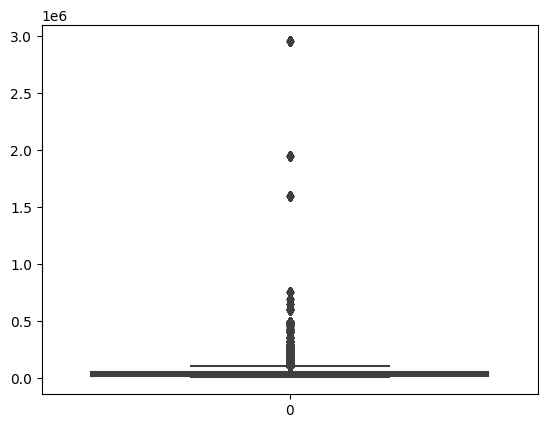

In [54]:
sns.boxplot(data['price'])

<Axes: >

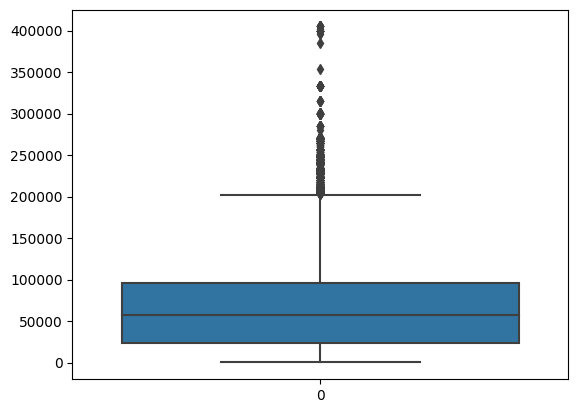

In [55]:
sns.boxplot(data['milage'])

In [56]:
numerical_data = ['price','milage']
def outlier(df,ft) :
    upper_limit = df[ft].mean() + 3*df[ft].std()
    lower_limit = df[ft].mean() - 3*df[ft].std()
    ls =  df.index[(df[ft] < lower_limit) | (df[ft] > upper_limit)]
    return ls
index = []
for col in numerical_data :
    index.extend(outlier(data,col))
index = sorted(set(index))
def remove_outlier(df,ls) :
    df = df.drop(ls,inplace = True)
    return df 
remove_outlier(data,index)


# 4. FEATURE ENGINEERING

In [57]:
# Extracting information from Transmission column

In [58]:
pd.set_option('display.max_rows' , 500)

In [59]:
def transmission_type(trans) :
    if 'Automatic' in trans or 'A/T' in  trans :
        return 'Automatic'
    elif 'Manual' in trans or 'M/T' in trans :
        return 'Manual'
    else :
        return 'Other'
import re
def gear(trans) :
    match = re.search(r'(\d+)-Speed',trans)
    if match : 
        return int(match.group(1))
    else :
        return np.nan
data['trans_type'] = data['transmission'].apply(transmission_type)
data['gear'] = data['transmission'].apply(gear)

In [60]:
test['trans_type'] = test['transmission'].apply(transmission_type)
test['gear'] = test['transmission'].apply(gear)

In [61]:
data.groupby(['brand', 'model', 'trans_type','fuel_type']).gear.value_counts().head(10)

brand  model                       trans_type  fuel_type  gear
Acura  330 i xDrive                Automatic   Gasoline   6.0     1
       ATS 2.0L Turbo Luxury       Automatic   Gasoline   8.0     1
       Acadia SLE-1                Automatic   Gasoline   9.0     1
       Air Pure                    Automatic   Gasoline   1.0     1
       CC Sport                    Manual      Gasoline   6.0     1
       CLK-Class CLK 350           Automatic   Gasoline   7.0     1
       CX-30 Base                  Automatic   Gasoline   6.0     1
       Corvette Stingray w/1LT     Automatic   Gasoline   8.0     1
       ILX 2.0L w/Premium Package  Automatic   Gasoline   6.0     5
                                                          8.0     4
Name: count, dtype: int64

In [62]:
# Extracting Information from Engine Column

In [63]:
import re 
def extract_engine_features(raw) :
    engine_info = raw['engine']
    
    #Extracting HorsePower of Car
    hp_match = re.search(r'(\d+\.?\d*)HP' , engine_info)
    horsepower = float(hp_match.group(1)) if hp_match else None
    
    #Extracting Engine Size of Car
    size_match = re.search(r'(\d+\.?\d*)L' , engine_info)
    engine_size = float(size_match.group(1)) if size_match else 0
    
    #Extracting Cylinders in Car
    cyl_match = re.search(r'(\d+)\s+Cylinder|V(\d+)' , engine_info)
    cylinders = int(cyl_match.group(1) or cyl_match.group(2)) if cyl_match else None
    
    return pd.Series([horsepower, engine_size, cylinders])
data[['horsepower', 'engine_size', 'cylinders']] = data.apply(extract_engine_features, axis=1)

In [64]:
test[['horsepower', 'engine_size', 'cylinders']] = test.apply(extract_engine_features, axis=1)

In [65]:
data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,trans_type,gear,horsepower,engine_size,cylinders
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,Automatic,NaN,172.0,1.6,4.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,Automatic,NaN,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,Gasoline,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,Automatic,NaN,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,Other,NaN,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,Automatic,7.0,208.0,2.0,4.0


In [66]:
data.engine_size.isnull().sum()

0

In [67]:
data.horsepower.isnull().sum()

32630

In [68]:
data.cylinders.isnull().sum()

21529

In [69]:
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,trans_type,gear,horsepower,engine_size,cylinders
0,188533,Land,Rover LR2 Base,2015,98000,Diesel,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes,Automatic,6.0,240.0,2.0,4.0
1,188534,Land,Rover Defender SE,2020,9142,Diesel,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes,Automatic,8.0,395.0,3.0,6.0
2,188535,Ford,Expedition Limited,2022,28121,Diesel,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,No,Automatic,10.0,NaN,3.5,6.0
3,188536,Audi,A6 2.0T Sport,2016,61258,Diesel,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,No,Automatic,NaN,NaN,0.0,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Diesel,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes,Automatic,NaN,252.0,2.0,4.0


In [70]:
test.horsepower.isnull().sum()

22181

In [71]:
test.engine_size.isnull().sum()

0

In [72]:
test.cylinders.isnull().sum()

14529

In [73]:
data[data.cylinders.isnull()][['engine']].head()

,engine
11,Electric Motor Electric Fuel System
32,518.0HP Electric Motor Electric Fuel System
44,835.0HP Electric Motor Electric Fuel System
51,Dual Motor - Standard
52,518.0HP Electric Motor Electric Fuel System


In [74]:

data.groupby(['brand','model','engine_size','cylinders']).horsepower.value_counts()

brand  model                  engine_size  cylinders  horsepower
Acura  300 Touring            3.5          6.0        250.0         1
       330 i xDrive           3.0          6.0        320.0         1
       335 is                 3.0          6.0        320.0         1
       ATS 2.0L Turbo Luxury  2.0          4.0        252.0         1
       CC Sport               2.4          4.0        201.0         1
                                                                   ..
Volvo  XC90 T6 Momentum       2.0          4.0        240.0         2
                                                      220.0         1
       i8 Base                1.5          3.0        357.0         1
smart  ForTwo Pure            1.0          3.0        70.0          1
                              1.8          4.0        170.0         1
Name: count, Length: 13155, dtype: int64

In [75]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
data['horsepower']=data.groupby(['brand','model','engine_size','cylinders']).horsepower.transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
test['horsepower']=test.groupby(['brand','model','engine_size','cylinders']).horsepower.transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


In [76]:
data['cylinders']=data.groupby(['brand','model','engine_size','horsepower']).cylinders.transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
test['cylinders']=test.groupby(['brand','model','engine_size','horsepower']).cylinders.transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [77]:
data['gear'] = data.groupby(['brand', 'model', 'trans_type','fuel_type'])['gear'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
test['gear'] = test.groupby(['brand', 'model', 'trans_type','fuel_type'])['gear'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [78]:
data.gear.isnull().value_counts()/data.shape[0]*100

gear
False    88.357166
True     11.642834
Name: count, dtype: float64

In [79]:
data[data.cylinders.isnull()][['horsepower','cylinders']].head()

,horsepower,cylinders
11,NaN,NaN
20,NaN,NaN
32,NaN,NaN
44,NaN,NaN
51,NaN,NaN


In [80]:
# Creating model to fill all other missing value

In [81]:
# Fillling HorsePower

In [82]:
# Fill remaining NaN values for horsepower using a predictive model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# Subset data into complete and incomplete cases
complete_hp = data[(data['horsepower'].notnull()) ]
incomplete_hp = data[(data['horsepower'].isnull())]

# Train the model on complete data
X_train_hp = pd.get_dummies(complete_hp[['engine_size','brand','model_year','trans_type']],drop_first =True,dtype = int)
y_train_hp = complete_hp['horsepower']


#cross_val_score(RandomForestRegressor(),X_train_hp, y_train_hp,cv=5)

In [83]:
model_hp = RandomForestRegressor()
model_hp.fit(X_train_hp, y_train_hp)


# Predict missing horsepower values
X_null_hp = pd.get_dummies(incomplete_hp[['engine_size', 'brand', 'model_year','trans_type']],drop_first = True , dtype =int)
X_null_hp = X_null_hp.reindex(columns=X_train_hp.columns, fill_value=0)
data.loc[data['horsepower'].isnull(), 'horsepower'] = model_hp.predict(X_null_hp)

incomplete_test_hp = test[(test['horsepower'].isnull())]
X2_null_hp = pd.get_dummies(incomplete_test_hp[['engine_size', 'brand', 'model_year','trans_type']],drop_first = True , dtype =int)
X2_null_hp = X2_null_hp.reindex(columns=X_train_hp.columns, fill_value=0)
test.loc[test['horsepower'].isnull(), 'horsepower'] = model_hp.predict(X2_null_hp)

In [84]:
# Filling Cylinders

In [85]:
# Fill remaining NaN values for horsepower using a predictive model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# Subset data into complete and incomplete cases
complete_hp = data[(data['cylinders'].notnull()) ]
incomplete_hp = data[(data['cylinders'].isnull())]

# Train the model on complete data
X_train_hp = pd.get_dummies(complete_hp[['engine_size','brand','model_year','trans_type','horsepower']],drop_first =True,dtype = int)
y_train_hp = complete_hp['cylinders']


#cross_val_score(RandomForestRegressor(),X_train_hp, y_train_hp,cv=5)

In [86]:
model_hp = RandomForestRegressor()
model_hp.fit(X_train_hp, y_train_hp)


# Predict missing horsepower values
X_null_hp = pd.get_dummies(incomplete_hp[['engine_size', 'brand', 'model_year','trans_type','horsepower']],drop_first = True , dtype =int)
X_null_hp = X_null_hp.reindex(columns=X_train_hp.columns, fill_value=0)
data.loc[data['cylinders'].isnull(), 'cylinders'] = model_hp.predict(X_null_hp)

incomplete_test_hp = test[(test['cylinders'].isnull())]
X2_null_hp = pd.get_dummies(incomplete_test_hp[['engine_size', 'brand', 'model_year','trans_type','horsepower']],drop_first = True , dtype =int)
X2_null_hp = X2_null_hp.reindex(columns=X_train_hp.columns, fill_value=0)
test.loc[test['cylinders'].isnull(), 'cylinders'] = model_hp.predict(X2_null_hp)

In [87]:
#Finding Gears

In [88]:
# Fill remaining NaN values for horsepower using a predictive model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# Subset data into complete and incomplete cases
complete_hp = data[(data['gear'].notnull()) ]
incomplete_hp = data[(data['gear'].isnull())]

# Train the model on complete data
X_train_hp = pd.get_dummies(complete_hp[['engine_size','brand','model_year','trans_type','fuel_type','horsepower','cylinders',]],drop_first =True,dtype = int)
y_train_hp = complete_hp['gear']

#X_train, X_test, y_train, y_test = train_test_split(X_train_hp,y_train_hp,test_size=0.3)

#score=cross_val_score(RandomForestRegressor(),X_train, y_train,cv=5)

#model_hp = RandomForestRegressor()
#model_hp.fit(X_test, y_test)

#print(f'train score : {score.mean()}')
#print(f'test score : {model_hp.score(X_test,y_test)}')

In [89]:
model_hp = RandomForestRegressor()
model_hp.fit(X_train_hp, y_train_hp)


# Predict missing horsepower values
X_null_hp = pd.get_dummies(incomplete_hp[['engine_size', 'brand', 'model_year','trans_type','horsepower','cylinders','fuel_type']],drop_first = True , dtype =int)
X_null_hp = X_null_hp.reindex(columns=X_train_hp.columns, fill_value=0)
data.loc[data['gear'].isnull(), 'gear'] = model_hp.predict(X_null_hp)

incomplete_test_hp = test[(test['gear'].isnull())]
X2_null_hp = pd.get_dummies(incomplete_test_hp[['engine_size', 'brand', 'model_year','trans_type','horsepower','cylinders','fuel_type']],drop_first = True , dtype =int)
X2_null_hp = X2_null_hp.reindex(columns=X_train_hp.columns, fill_value=0)
test.loc[test['gear'].isnull(), 'gear'] = model_hp.predict(X2_null_hp)

In [90]:
data.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
trans_type      0
gear            0
horsepower      0
engine_size     0
cylinders       0
dtype: int64

In [91]:
data['test_train'] =1
test['test_train'] =0
test['price'] = np.NaN
all_data = pd.concat([data,test])
all_data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,trans_type,gear,horsepower,engine_size,cylinders,test_train
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0,Automatic,6.000000,172.000000,1.6,4.0,1
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0,Automatic,5.000000,252.000000,3.9,8.0,1
2,2,Chevrolet,Silverado 2500 LT,2002,136731,Gasoline,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0,Automatic,6.000000,320.000000,5.3,8.0,1
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0,Other,7.249345,420.000000,5.0,8.0,1
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0,Automatic,7.000000,208.000000,2.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Diesel,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes,NaN,Automatic,7.000000,362.000000,3.0,6.0,0
125686,314219,Audi,Q7 55 Prestige,2019,29336,Diesel,3.0 Liter Turbo,Automatic,White,Black,None reported,No,NaN,Automatic,8.000000,154.218431,0.0,3.0,0
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Diesel,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN,Automatic,8.000000,333.000000,3.0,6.0,0
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Diesel,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN,Automatic,8.000000,333.000000,3.0,6.0,0


In [92]:
all_dummies = pd.get_dummies(all_data[['brand','model_year','milage','fuel_type','ext_col','int_col','accident','clean_title','trans_type','gear','horsepower','cylinders','test_train']],dtype = int)

In [93]:
all_dummies

,model_year,milage,gear,horsepower,cylinders,test_train,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,...,int_col_White / Brown,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_No,clean_title_Yes,trans_type_Automatic,trans_type_Manual,trans_type_Other
0,2007,213000,6.000000,172.000000,4.0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,2002,143250,5.000000,252.000000,8.0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,2002,136731,6.000000,320.000000,8.0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,2017,19500,7.249345,420.000000,8.0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,2021,7388,7.000000,208.000000,4.0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,2014,83315,7.000000,362.000000,6.0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
125686,2019,29336,8.000000,154.218431,3.0,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0
125687,2012,77634,8.000000,333.000000,6.0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
125688,2012,112000,8.000000,333.000000,6.0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0


In [94]:
'''from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Assume df is your large dataset with many columns
# Define columns to scale (for this example: mileage and model_year)
columns_to_scale = ['milage', 'model_year','hp']

# Use ColumnTransformer to scale specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columns_to_scale),  # Scaling only 'mileage' and 'model_year'
    ],
    remainder='passthrough'  # Leave the other columns unchanged
)

# Fit and transform the data
# Assuming df is large, this will handle it efficiently
scaled_data = preprocessor.fit_transform(all_dummies)

# Convert the scaled data back to a DataFrame
# Since remainder='passthrough', original column order may change, so we rename them accordingly
scaled_all = pd.DataFrame(scaled_data, columns=columns_to_scale + [col for col in all_dummies.columns if col not in columns_to_scale])

# Print the first few rows to check the output
scaled_all.head()
'''

"from sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import StandardScaler\n\n# Assume df is your large dataset with many columns\n# Define columns to scale (for this example: mileage and model_year)\ncolumns_to_scale = ['milage', 'model_year','hp']\n\n# Use ColumnTransformer to scale specific columns\npreprocessor = ColumnTransformer(\n    transformers=[\n        ('num', StandardScaler(), columns_to_scale),  # Scaling only 'mileage' and 'model_year'\n    ],\n    remainder='passthrough'  # Leave the other columns unchanged\n)\n\n# Fit and transform the data\n# Assuming df is large, this will handle it efficiently\nscaled_data = preprocessor.fit_transform(all_dummies)\n\n# Convert the scaled data back to a DataFrame\n# Since remainder='passthrough', original column order may change, so we rename them accordingly\nscaled_all = pd.DataFrame(scaled_data, columns=columns_to_scale + [col for col in all_dummies.columns if col not in columns_to_scale])\n\n# Print the firs

In [95]:
'''x_train = scaled_all[scaled_all.test_train == 1].drop(['test_train'], axis =1)
x_test = scaled_all[scaled_all.test_train == 0].drop(['test_train'], axis =1)

y_train  = all_data[all_data.test_train == 1].price
y_train.shape,x_train.shape,x_test.shape'''

"x_train = scaled_all[scaled_all.test_train == 1].drop(['test_train'], axis =1)\nx_test = scaled_all[scaled_all.test_train == 0].drop(['test_train'], axis =1)\n\ny_train  = all_data[all_data.test_train == 1].price\ny_train.shape,x_train.shape,x_test.shape"

In [96]:
#x_train.shape

In [97]:
# Lets train the data
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA

In [98]:
'''pca = PCA(n_components=59)  # Adjust n_components based on variance explained
x_train_pca_L = pca.fit_transform(x_train)
x_test_pca_L = pca.transform(x_test)'''

'pca = PCA(n_components=59)  # Adjust n_components based on variance explained\nx_train_pca_L = pca.fit_transform(x_train)\nx_test_pca_L = pca.transform(x_test)'

In [99]:
#x_train_pca_L.shape

In [100]:
'''pca = PCA()
pca.fit(X_train)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()'''


"pca = PCA()\npca.fit(X_train)\nexplained_variance = np.cumsum(pca.explained_variance_ratio_)\n\nplt.plot(explained_variance)\nplt.xlabel('Number of Components')\nplt.ylabel('Cumulative Explained Variance')\nplt.title('PCA Explained Variance')\nplt.show()"

In [101]:
'''# Determine the number of components that explain 95% of the variance
pca = PCA()
pca.fit(X_train)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components that explain 95% of the variance: {num_components_95}")'''


'# Determine the number of components that explain 95% of the variance\npca = PCA()\npca.fit(X_train)\ncumulative_variance = np.cumsum(pca.explained_variance_ratio_)\nnum_components_95 = np.argmax(cumulative_variance >= 0.95) + 1\nprint(f"Number of components that explain 95% of the variance: {num_components_95}")'

In [102]:
'''model = Ridge(solver='saga', alpha=1.0, max_iter=1000)
scores = cross_val_score(model,x_train_pca_L,y_train,cv=5,scoring = 'neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

# Print RMSE scores for each fold
print(f'Cross-Validated RMSE Scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')'''

"model = Ridge(solver='saga', alpha=1.0, max_iter=1000)\nscores = cross_val_score(model,x_train_pca_L,y_train,cv=5,scoring = 'neg_mean_squared_error')\nrmse_scores = np.sqrt(-scores)\n\n# Print RMSE scores for each fold\nprint(f'Cross-Validated RMSE Scores: {rmse_scores}')\nprint(f'Mean RMSE: {rmse_scores.mean()}')"

In [103]:
#model.fit(x_train_pca_L,y_train)

In [104]:
#prediction = model.predict(x_test_pca_L)

In [105]:
#df = {'id':test.id , 'price' : prediction}

In [106]:
#submission = pd.DataFrame(data = df)
#submission.to_csv('submission.csv',index = False)

In [107]:
#submission.head()

In [108]:
 import xgboost as xgb

In [109]:
X_train = all_dummies[all_dummies.test_train == 1].drop(['test_train'], axis =1)
X_test = all_dummies[all_dummies.test_train == 0].drop(['test_train'], axis =1)

y_train  = all_data[all_data.test_train == 1].price

In [110]:
#{'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.02, 'lambda': 1, 'colsample_bytree': 0.6, 'alpha': 0.0

In [111]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror',subsample = 0.8, n_estimators = 1000, min_child_weight = 3 ,max_depth = 7, learning_rate = 0.02, colsample_bytree = 0.6 , reg_lambda = 1,reg_alpha = 0.0)
scores = cross_val_score(model_xgb,X_train,y_train,cv=5,scoring = 'neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

# Print RMSE scores for each fold
print(f'Cross-Validated RMSE Scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')

Cross-Validated RMSE Scores: [25893.47755648 26560.10293976 25815.67286058 26945.77193982
 25783.97479485]
Mean RMSE: 26199.80001829868


In [112]:
'''current Mean RMSE : 26775.87061987866
mean after feature selection : 26276.38142581412
mean after scaling  : 26276.38142581412
mean after scaling again : 26197.331748028948'''

'current Mean RMSE : 26775.87061987866\nmean after feature selection : 26276.38142581412\nmean after scaling  : 26276.38142581412\nmean after scaling again : 26197.331748028948'

In [113]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [114]:
prediction = model_xgb.predict(X_test)

In [115]:
df = {'id':test.id , 'price' : prediction}

In [116]:
submission = pd.DataFrame(data = df)
submission.to_csv('submission.csv',index = False)

In [117]:
#import lightgbm as lgb

In [118]:
'''lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
# Perform 5-fold cross-validation
cv_scores = cross_val_score(lgb_model, x_train_pca_L, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE
rmse_scores = np.sqrt(-cv_scores)

# Output the scores
print("Cross-validation RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())
'''

'lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)\n# Perform 5-fold cross-validation\ncv_scores = cross_val_score(lgb_model, x_train_pca_L, y_train, cv=5, scoring=\'neg_mean_squared_error\')\n\n# Convert negative MSE to positive RMSE\nrmse_scores = np.sqrt(-cv_scores)\n\n# Output the scores\nprint("Cross-validation RMSE scores:", rmse_scores)\nprint("Average RMSE:", rmse_scores.mean())\n'

In [119]:
'''from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [600, 800, 900, 1000],  # Reduced the range to prevent overfitting
    'learning_rate': [0.01, 0.02, 0.03],    # Increased range to find better convergence
    'max_depth': [4, 5, 6, 7],              # Added lower depth to capture simpler models
    'subsample': [0.7, 0.8, 0.9],           # Adjusted subsample range
    'colsample_bytree': [0.6, 0.7, 0.8],    # Added a lower value for experimentation
    'min_child_weight': [3, 5],              # Added min_child_weight for regularization
    'alpha': [0.0, 0.01],                    # Added L1 regularization parameter
    'lambda': [0.0, 1]                       # Added L2 regularization parameter
}

# Initialize the model
xgb_model = XGBRegressor(objective='reg:squarederror')

# Perform randomized search
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, 
                                   n_iter=20, scoring='neg_mean_squared_error', 
                                    cv= 3 , verbose=1, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best RMSE: {np.sqrt(-random_search.best_score_)}")'''

'from xgboost import XGBRegressor\nfrom sklearn.model_selection import RandomizedSearchCV\n\n# Define the hyperparameter grid\nparam_dist = {\n    \'n_estimators\': [600, 800, 900, 1000],  # Reduced the range to prevent overfitting\n    \'learning_rate\': [0.01, 0.02, 0.03],    # Increased range to find better convergence\n    \'max_depth\': [4, 5, 6, 7],              # Added lower depth to capture simpler models\n    \'subsample\': [0.7, 0.8, 0.9],           # Adjusted subsample range\n    \'colsample_bytree\': [0.6, 0.7, 0.8],    # Added a lower value for experimentation\n    \'min_child_weight\': [3, 5],              # Added min_child_weight for regularization\n    \'alpha\': [0.0, 0.01],                    # Added L1 regularization parameter\n    \'lambda\': [0.0, 1]                       # Added L2 regularization parameter\n}\n\n# Initialize the model\nxgb_model = XGBRegressor(objective=\'reg:squarederror\')\n\n# Perform randomized search\nrandom_search = RandomizedSearchCV(xgb_mo

In [120]:
'''from sklearn.model_selection import RandomizedSearchCV
ridge = Ridge()
param_dist = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['auto', 'svd', 'cholesky', 'saga'],
    'fit_intercept': [True, False]
}

random_search = RandomizedSearchCV(ridge, param_distributions=param_dist, n_iter=10, 
                                   scoring='neg_mean_squared_error', cv=2, verbose=1, n_jobs=-1)

random_search.fit(x_train_pca_L, y_train)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best RMSE: {np.sqrt(-random_search.best_score_)}")
'''

'from sklearn.model_selection import RandomizedSearchCV\nridge = Ridge()\nparam_dist = {\n    \'alpha\': [0.01, 0.1, 1, 10, 100, 1000],\n    \'solver\': [\'auto\', \'svd\', \'cholesky\', \'saga\'],\n    \'fit_intercept\': [True, False]\n}\n\nrandom_search = RandomizedSearchCV(ridge, param_distributions=param_dist, n_iter=10, \n                                   scoring=\'neg_mean_squared_error\', cv=2, verbose=1, n_jobs=-1)\n\nrandom_search.fit(x_train_pca_L, y_train)\n\nprint(f"Best Parameters: {random_search.best_params_}")\nprint(f"Best RMSE: {np.sqrt(-random_search.best_score_)}")\n'

In [121]:
'''import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Assuming your PCA-transformed data (x_train_pca_L) and target (y_train) are already loaded.
# x_train_pca_L.shape = (184878, 59)

# Split data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(x_train_pca_L, y_train, test_size=0.2, random_state=42)

# Define your ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # MSE loss

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train, Y_train, 
                    validation_data=(X_val, Y_val),
                    epochs=100, 
                    batch_size=32, 
                    verbose=1, 
                    callbacks=[early_stopping])

# Plot training & validation loss (MSE) values
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Convert the final MSE to RMSE for validation set
val_mse = model.evaluate(X_val, Y_val, verbose=0)  # MSE
val_rmse = np.sqrt(val_mse)  # RMSE
print(f'Validation RMSE: {val_rmse}')

# Optionally, make predictions and calculate RMSE for predictions
# Ensure Y_pred is flattened (1D)
Y_pred = model.predict(X_val).flatten()

# Ensure Y_val is also a 1D array
Y_val = Y_val.values.flatten()  # Convert from pandas series to NumPy array, if necessary

# Now calculate RMSE
rmse = np.sqrt(np.mean((Y_val - Y_pred) ** 2))
print(f'Calculated RMSE on Validation Set: {rmse}')
'''

"import numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\nfrom tensorflow.keras.callbacks import EarlyStopping\nimport matplotlib.pyplot as plt\n\n# Assuming your PCA-transformed data (x_train_pca_L) and target (y_train) are already loaded.\n# x_train_pca_L.shape = (184878, 59)\n\n# Split data into training and validation sets\nX_train, X_val, Y_train, Y_val = train_test_split(x_train_pca_L, y_train, test_size=0.2, random_state=42)\n\n# Define your ANN model\nmodel = Sequential([\n    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer\n    Dense(64, activation='relu'),  # Hidden layer\n    Dense(32, activation='relu'),  # Hidden layer\n    Dense(1)  # Output layer\n])\n\n# Compile the model\nmodel.compile(optimizer='adam', loss='mean_squared_error')  # MSE loss\n\n# Define early stopping\nearly_stopping = EarlyStopping(monitor='val_loss', patience=10, 

In [122]:
'''# Step 1: Split the data into training and validation sets
X_train_full, X_val, y_train_full, y_val = train_test_split(
    x_train_pca_L, y_train, test_size=0.2, random_state=42
)

# Step 2: Sample a portion of the training data for hyperparameter tuning
X_train_sample, X_val_tune, y_train_sample, y_val_tune = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)'''

'# Step 1: Split the data into training and validation sets\nX_train_full, X_val, y_train_full, y_val = train_test_split(\n    x_train_pca_L, y_train, test_size=0.2, random_state=42\n)\n\n# Step 2: Sample a portion of the training data for hyperparameter tuning\nX_train_sample, X_val_tune, y_train_sample, y_val_tune = train_test_split(\n    X_train_full, y_train_full, test_size=0.1, random_state=42)'

In [123]:
'''import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import optuna

# Define a basic model for debugging
def create_model(neurons, optimizer):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_sample.shape[1], activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the objective function
def objective(trial):
    model = create_model(
        neurons=trial.suggest_categorical('neurons', [32, 64, 128]),
        optimizer=trial.suggest_categorical('optimizer', ['adam', 'rmsprop'])
    )
    
    history = model.fit(X_train_sample, y_train_sample,
                        epochs=trial.suggest_int('epochs', 10, 20),
                        batch_size=trial.suggest_categorical('batch_size', [16, 32]),
                        validation_data=(X_val, y_val),
                        verbose=0)
    
    # Print metrics available in history
    print(f"Available metrics: {history.history.keys()}")
    
    # Use validation loss or fallback to training loss
    val_loss = min(history.history.get('val_loss', [float('inf')]))
    return val_loss

# Create Optuna study and optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Print best parameters and best score
print(f"Best Parameters: {study.best_params}")
print(f"Best Score: {study.best_value}")

# Fit the best model with full training data
best_params = study.best_params
best_model = create_model(neurons=best_params['neurons'], optimizer=best_params['optimizer'])
best_model.fit(X_train, y_train,
               epochs=best_params['epochs'],
               batch_size=best_params['batch_size'],
               validation_data=(X_val, y_val),
               verbose=0)

# Evaluate on validation data
y_pred = best_model.predict(X_val)
rmse = np.sqrt(np.mean((y_val - y_pred)**2))
print(f"Calculated RMSE on Validation Set: {rmse}")
'''

'import numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\nimport optuna\n\n# Define a basic model for debugging\ndef create_model(neurons, optimizer):\n    model = Sequential()\n    model.add(Dense(neurons, input_dim=X_train_sample.shape[1], activation=\'relu\'))\n    model.add(Dense(neurons, activation=\'relu\'))\n    model.add(Dense(1))\n    model.compile(loss=\'mean_squared_error\', optimizer=optimizer)\n    return model\n\n# Define the objective function\ndef objective(trial):\n    model = create_model(\n        neurons=trial.suggest_categorical(\'neurons\', [32, 64, 128]),\n        optimizer=trial.suggest_categorical(\'optimizer\', [\'adam\', \'rmsprop\'])\n    )\n    \n    history = model.fit(X_train_sample, y_train_sample,\n                        epochs=trial.suggest_int(\'epochs\', 10, 20),\n                        batch_size=trial.suggest_categorical(\'batch_size\', [16, 32]),\n                    

In [124]:
'''prediction = model.predict(x_test_pca_L).flatten()
df = {'id':test.id , 'price' : prediction}
submission = pd.DataFrame(data = df)
submission.to_csv('submission.csv',index = False)'''

"prediction = model.predict(x_test_pca_L).flatten()\ndf = {'id':test.id , 'price' : prediction}\nsubmission = pd.DataFrame(data = df)\nsubmission.to_csv('submission.csv',index = False)"

In [125]:
'''Calculated RMSE on Validation Set: 26806.09499262167 using neural network
Best RMSE: 26789.73828625763 using xgboost'''

'Calculated RMSE on Validation Set: 26806.09499262167 using neural network\nBest RMSE: 26789.73828625763 using xgboost'